 Usando o banco de dados oferecido pelo site do governo federal sobre o enem 2019, a ideia é pegar a grande quantidade de dados disponibilizada e fazer análises usando as principais informações como renda do candidato, notas na prova, estado do candidato.
 As Distribuições e correlações servem para entender melhor o comportamento de cada dado e com a análise exploratória entendemos mais como diferentes informações de cada candidato podem ser relacionadas e responder perguntas do tipo: "Candidadatos de baixa renda vão bem na prova de matemática?". Esse tipo de pergunta pode ser fundamental para começar a entender a realidade de um candidato com base nos dados. Por fim é implementado modelos de ML explorando suas dependencias para descobrir se com as notas de linguagens, ciências, e redação é possível prever como o candidato vai na prova de matemática. 


# Explorando os dados


In [1]:
import pandas as pd

dados = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true",sep=',')

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [2]:
dados.shape #numero de linhas e colunas
dados.columns.values #nome das colunas

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [3]:
dados['SG_UF_RESIDENCIA'].unique() #saber quais estados participaram 

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

<AxesSubplot:>

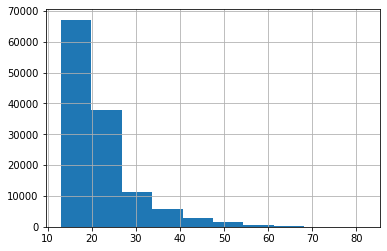

In [4]:
dados['NU_IDADE'].hist()

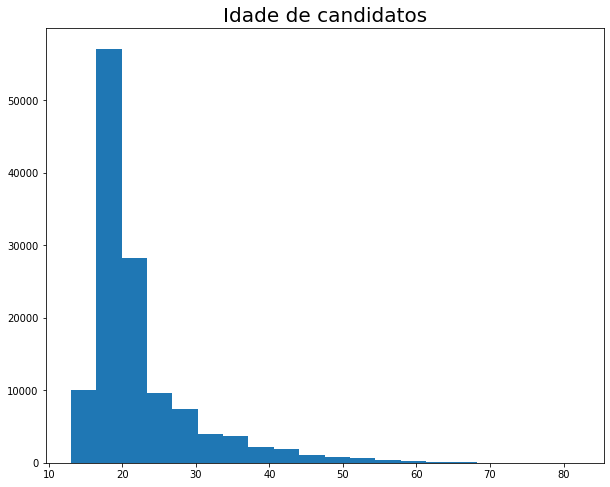

In [5]:
import matplotlib.pyplot as plt


dados['NU_IDADE'].hist(bins=20,figsize=(10,8),grid = False)
plt.title('Idade de candidatos',size = 20);


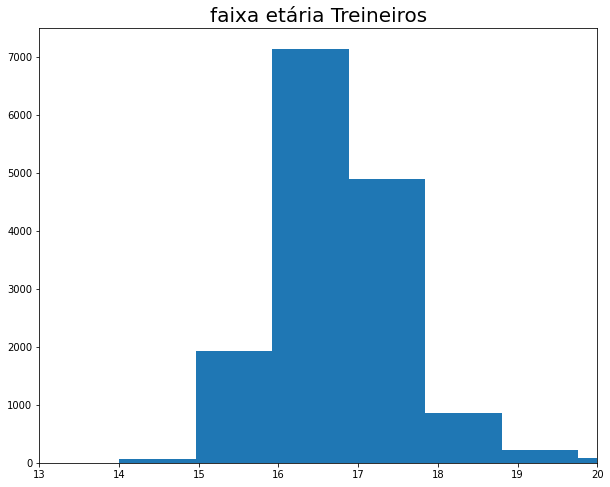

In [6]:
from pickle import FALSE
#Procurar por dados de candidatos que são treineiros, ou seja, a nota não elege para a faculdade

dados.query('IN_TREINEIRO ==1')
#descobrir faixa etaria de quem mais participa como treineiro 
dados.query('IN_TREINEIRO ==1')['NU_IDADE'].hist(bins = 50,figsize= (10,8),grid = False)
plt.xlim(13,20)
plt.title("faixa etária Treineiros", size = 20);

# Análise exploratória

<AxesSubplot:>

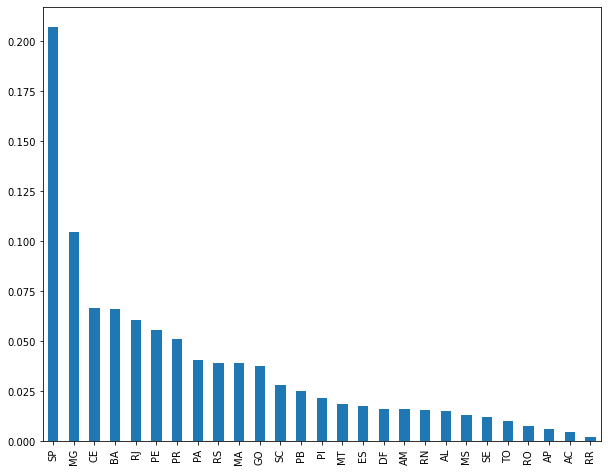

In [7]:
#Proporção de participação de pessoas menores de 18 anos em cada estado 

alunos_menor18 = dados.query("NU_IDADE <= 18")
alunos_menor18['SG_UF_RESIDENCIA'].value_counts(normalize = True).plot.bar(figsize=(10,8))


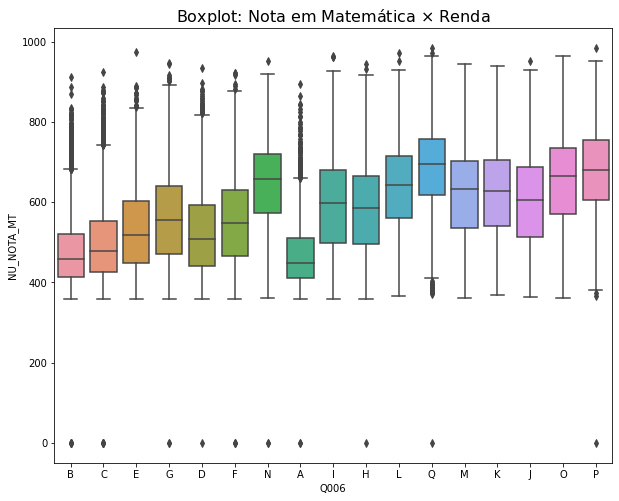

In [8]:
import seaborn as sns

#Na inscrição os candidatos responderam a uma série de perguntas sobre sua situação social.
#A pergunta Q006 diz respeito sobre a renda de cada candidato
#Veremos a relação de renda e desempenho na prova de matemática

fig = plt.subplots(figsize=(10,8))
plt.title(r"Boxplot: Nota em Matemática $\times$ Renda",size=16)
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados );

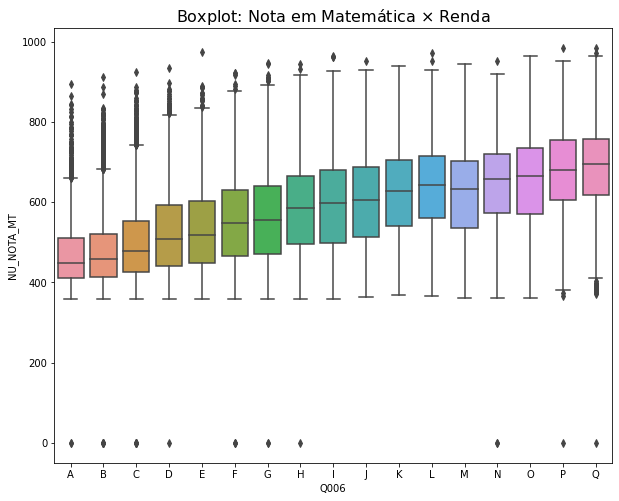

In [9]:
#No eixo x do gráfico anterior não está ordenado. Vamor ordenar 

renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

fig = plt.subplots(figsize=(10,8))
plt.title(r"Boxplot: Nota em Matemática $\times$ Renda",size=16)
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada );

#A nota aumenta conforme a renda. a dispoersão diminui 

In [10]:
# Ve se a nota total dos partipantes tem o mesmo o comportamento da análise anterior

provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


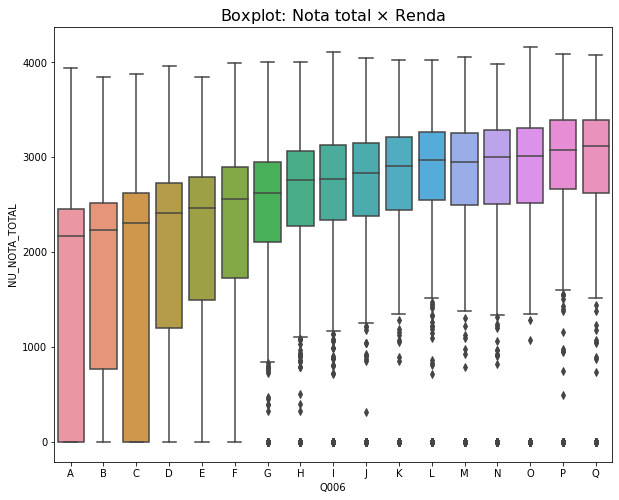

In [11]:
fig = plt.subplots(figsize=(10,8))
plt.title(r"Boxplot: Nota total $\times$ Renda",size=16)
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada );

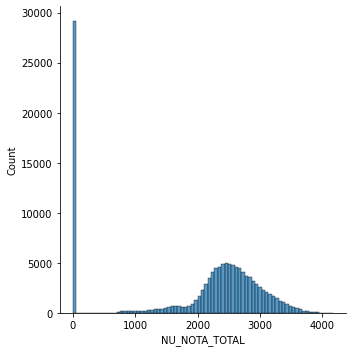

In [12]:
sns.displot(dados, x = "NU_NOTA_TOTAL");

#entender mais o porque as pessoas tiram 0 

In [13]:
provas.append('NU_NOTA_TOTAL')
dados[provas].query('NU_NOTA_TOTAL == 0')

#não há dados de notas então essas pessoas não foram fazer a nota

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
#Para valorizar a análise vamos considerar candidatos que participaram da prova por pelo menos 1 dia 
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0") 
dados_sem_nota_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


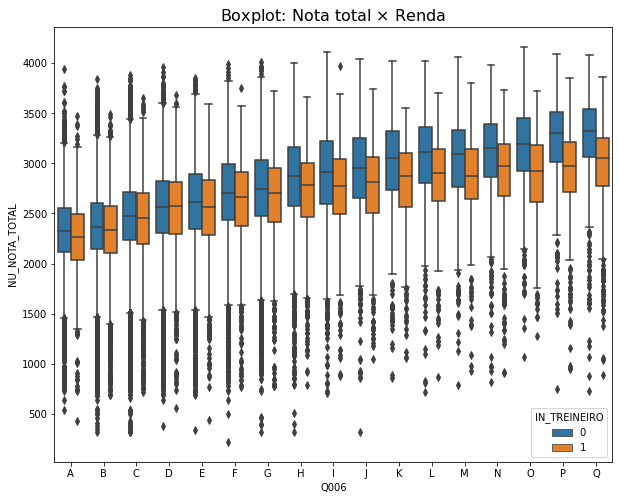

In [15]:
fig = plt.subplots(figsize=(10,8))
plt.title(r"Boxplot: Nota total $\times$ Renda",size=16)
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_nota_zero, 
            hue = 'IN_TREINEIRO',order = renda_ordenada ); #constraste com candidatos que fazem a prova para treinar; 0 sim 1 não

# Distribuições e correlações

<AxesSubplot:xlabel='NU_NOTA_TOTAL', ylabel='Count'>

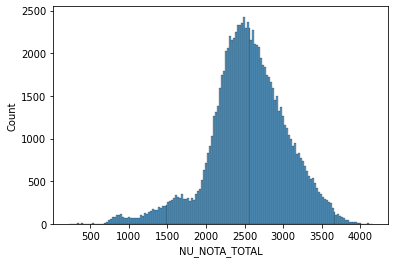

In [16]:
sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_TOTAL")

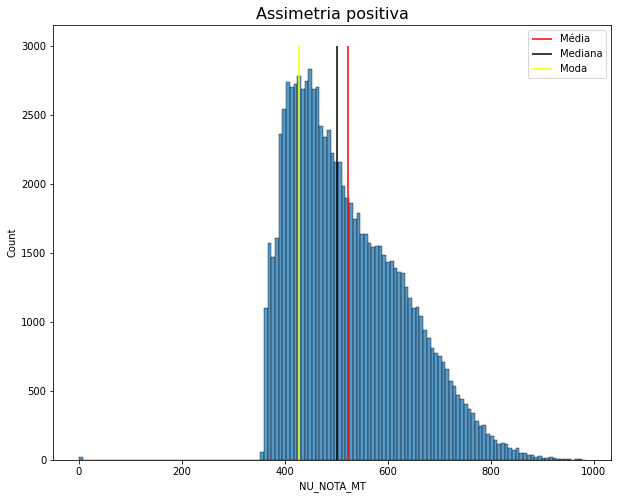

In [17]:
import numpy as np
import scipy as sp
from scipy import stats

plt.figure(figsize=(10,8))

sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_MT")
media = np.mean(dados_sem_nota_zero['NU_NOTA_MT'])
mediana = dados_sem_nota_zero['NU_NOTA_MT'].median()
moda = dados_sem_nota_zero['NU_NOTA_MT'].mode()
plt.vlines(media,0,3000,color='r', label = 'Média');
plt.vlines(mediana,0,3000,color='black', label = 'Mediana');
plt.vlines(moda,0,3000,color='yellow',label = 'Moda');
plt.legend();
plt.title("Assimetria positiva",size = 16);

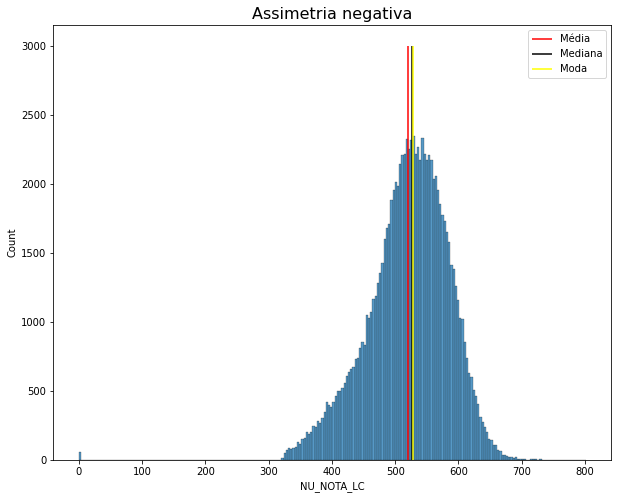

In [18]:
plt.figure(figsize=(10,8))

sns.histplot(dados_sem_nota_zero, x = "NU_NOTA_LC")
media = np.mean(dados_sem_nota_zero['NU_NOTA_LC'])
mediana = dados_sem_nota_zero['NU_NOTA_LC'].median()
moda = dados_sem_nota_zero['NU_NOTA_LC'].mode()
plt.vlines(media,0,3000,color='r', label = 'Média');
plt.vlines(mediana,0,3000,color='black', label = 'Mediana');
plt.vlines(moda,0,3000,color='yellow',label = 'Moda');
plt.legend();
plt.title("Assimetria negativa",size=16);

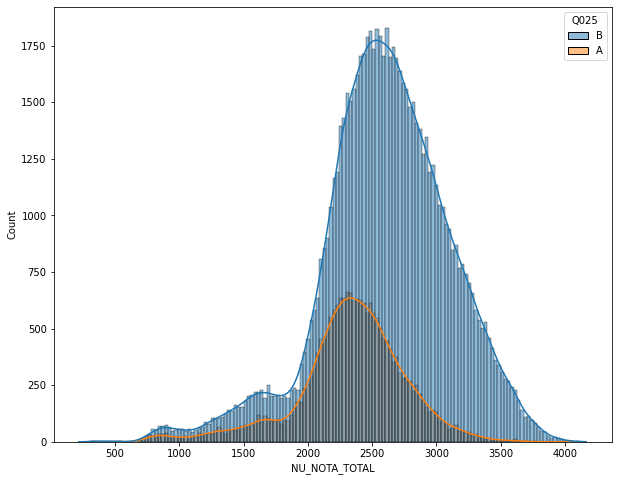

In [19]:
# participantes que não e possuem internet 
#B => possuem internet; A => não possuem internet

plt.figure(figsize=(10,8))
sns.histplot(dados_sem_nota_zero,x ="NU_NOTA_TOTAL", hue = "Q025", kde = "True");

(-50.0, 1050.0)

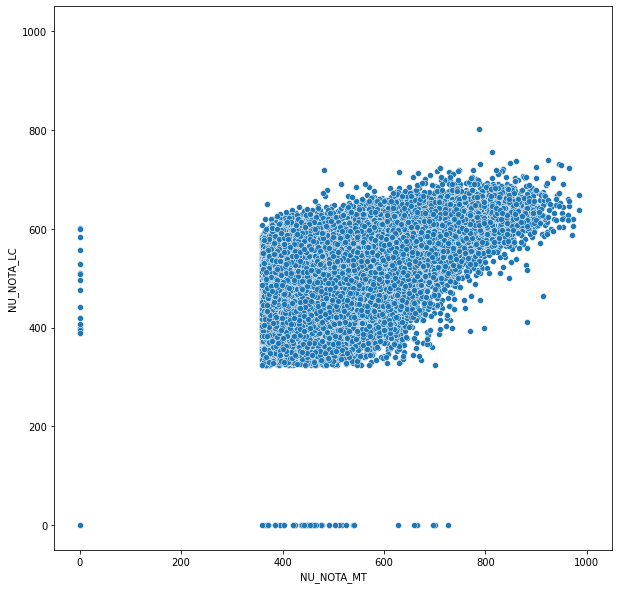

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = dados_sem_nota_zero,x = 'NU_NOTA_MT', y ='NU_NOTA_LC')
plt.xlim(-50,1050)
plt.ylim(-50,1050)



#ponto para cada pessoa e sua respectiva nota em matemática

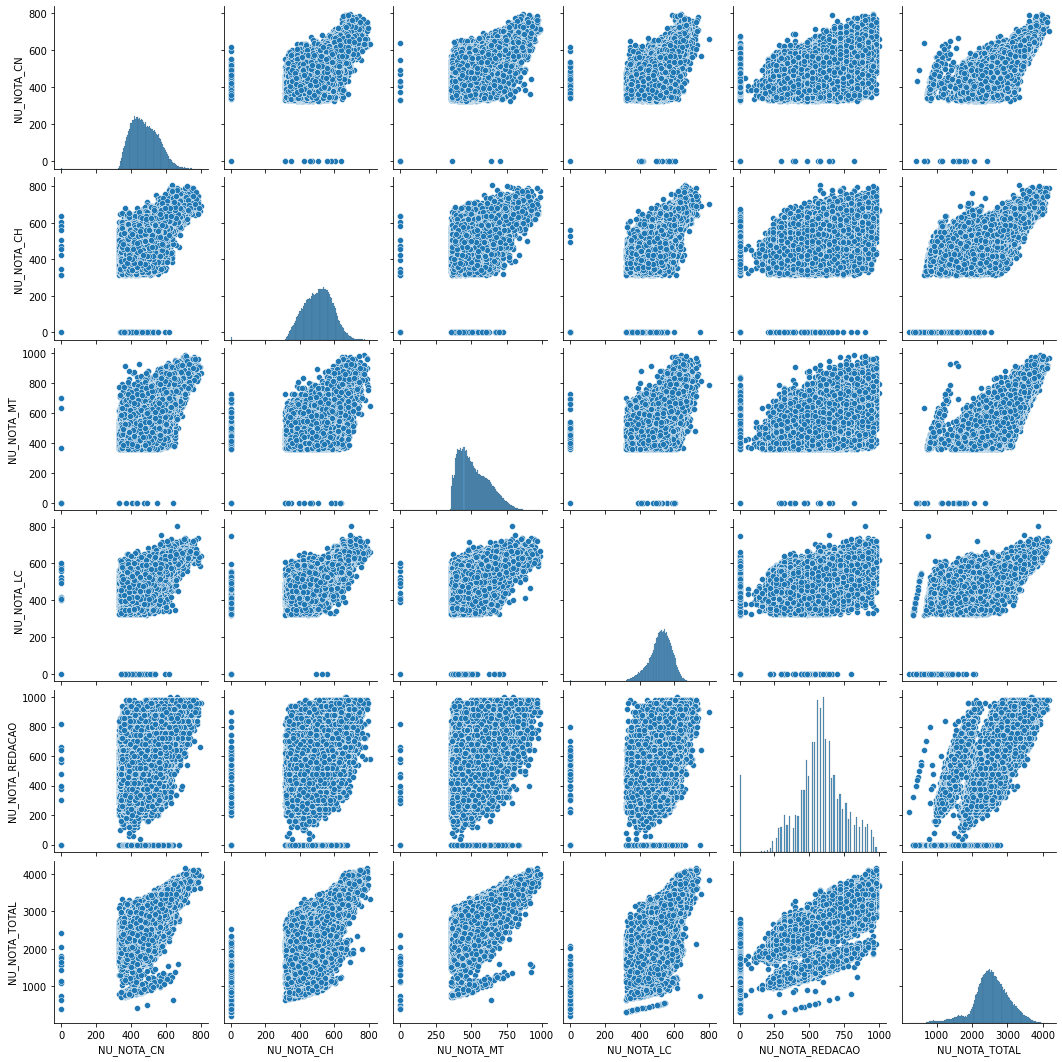

In [21]:
#graficos de correlação entre todas as provas

sns.pairplot(dados_sem_nota_zero[provas])

In [22]:
#a correlação varia de -1 a 1 
# 0 é quando não há correlação entre as variáveis
# Quando a correlação está perto de -1 e 1 a correlação é forte 
# quando a correlação é negativa indica que quando uma variável sobe a outra desce
#quando é positiva as duas sobem 

correlacao = dados_sem_nota_zero[provas].corr()
correlacao




,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


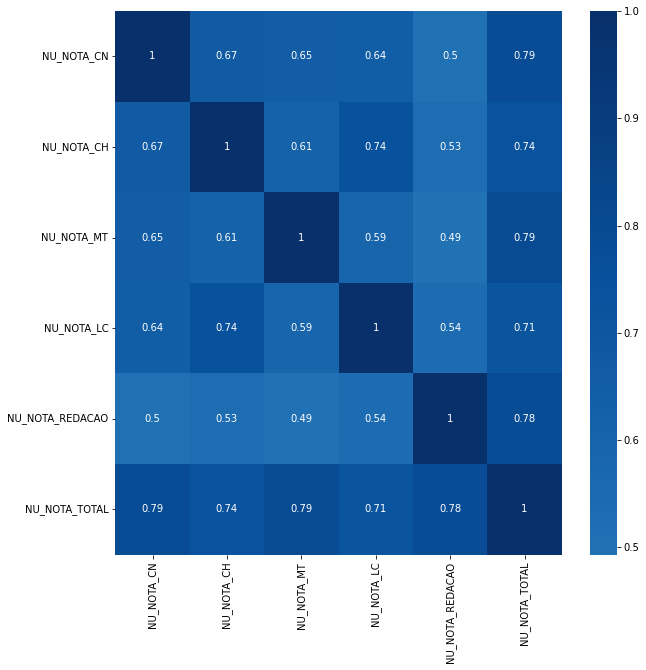

In [23]:
#Podemos analisar as correlações através de um mapa de calor

plt.figure(figsize=(10,10))
sns.heatmap(correlacao,cmap='Blues',center =0,annot=True);

# Modelos de machine Learning

In [24]:
# Será que é possível prever a nota de matemática com base nas outras avaliações? 

#com base nessas provas
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]

#quero descobrir
prova_saida = ["NU_NOTA_MT"] 

#criar um df com provas de saida e entradas separadas 
dados_sem_nota_zero=dados_sem_nota_zero[provas].dropna()
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saidas = dados_sem_nota_zero[prova_saida]

In [25]:
x = notas_entrada
y = notas_saidas

In [26]:
from sklearn.model_selection import train_test_split

SEED = 4321
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=SEED)

In [27]:
#criando o modelo 

from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=4321)

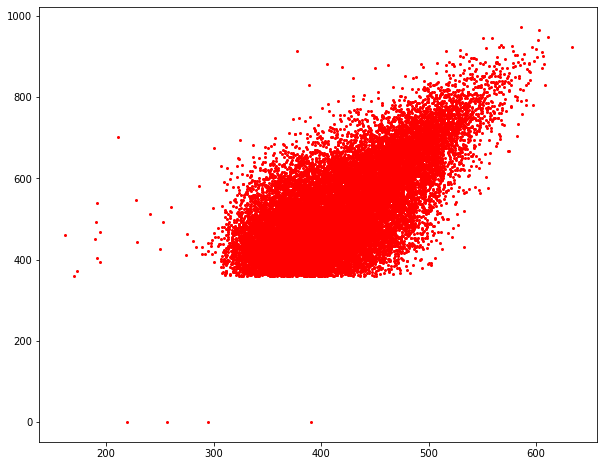

In [28]:
#previsao 
plt.figure(figsize=(10,8))
previsao = modelo.predict(x_test)

#comparando a previsao com teste
plt.plot(previsao, y_test, 'ro',markersize = 2)

In [29]:
resultados = pd.DataFrame()
resultados["Real"] = y_test
resultados["Previsao"] = previsao
resultados["Diferenca"] = (resultados["Real"] - resultados["Previsao"])
resultados["quadrado_diferenca"] = (resultados["Real"] - resultados["Previsao"])**2
resultados

,Real,Previsao,Diferenca,quadrado_diferenca
114991,459.7,420.319501,39.380499,1550.823695
104685,617.2,478.717001,138.482999,19177.541062
91028,520.0,385.706927,134.293073,18034.629483
115802,703.8,459.039807,244.760193,59907.551863
93303,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
81393,688.6,482.168386,206.431614,42614.011438
40159,479.1,489.849362,-10.749362,115.548776
64083,501.4,471.762378,29.637622,878.388662
84661,772.5,540.546723,231.953277,53802.322714


In [30]:
resultados["quadrado_diferenca"].mean()**(1/2)

#Isso significa que em média nosso modelo erra 135 pontos

135.36661229420264

In [31]:
#para saber se nosso modelo esta indo bem ou não 

from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_train,y_train)
dummy_predicons = modelo_dummy.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,dummy_predicons)

12063.645588509502

# VALIDAÇÃO DE MODELO E OVERFIT

In [33]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED) #nosso modelo depende da aleatoriedade
modelo.fit(x_train,y_train)
previsoes = modelo.predict(x_test)
mean_squared_error(y_test,previsoes)

#Temos que reduzir a dependencia com aleatoriedade e obter um grau de confiabilidade nos nossos resultados

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


18324.11972400897

In [34]:
#usar modelo que não dependa do random_state

from sklearn.tree import DecisionTreeRegressor

modelo_arvore = DecisionTreeRegressor(max_depth=3)
modelo_arvore.fit(x_train,y_train)
previsoes = modelo_arvore.predict(x_test)
mean_squared_error(y_test,previsoes)

#Quando consultamos na documentação vemos que o decision Tree também tem dependencia com random_state 
#em qual confiar? 
#Temos que aletoriedade também esta relacionada na forma ue divimos nossos dados em treino e teste 
#Temos que reduzir a aletoriedade nessa divisão de dados fazendo cross validation para comparar modelos

6027.166905272976

In [35]:
from sklearn.model_selection import cross_validate
modelo = DecisionTreeRegressor(max_depth = 2)
resultados = cross_validate(modelo,x,y,cv = 10,scoring = "neg_mean_squared_error")# o cv muda as partições de treino e teste 
media = (resultados['test_score']*(-1)).mean() 
desvio = (resultados['test_score']*(-1)).std()
limite_inf = media - 2*desvio
limite_sup =media + 2*desvio

media,desvio,limite_inf,limite_sup

#95% das nossas previsões estão entre os limites inferior e superior 

(6558.227664658769, 271.25255756098164, 6015.722549536806, 7100.732779780732)

In [36]:
#criar uma função com os calculos para não ficar repetindo 
def calcula (resultados):
  media = (resultados['test_score']*(-1)).mean() 
  desvio = (resultados['test_score']*(-1)).std()
  limite_inf = media - 2*desvio
  limite_sup =media + 2*desvio
  print(f"intervalo de confiança {limite_inf} - {limite_sup}")

calcula(resultados)

intervalo de confiança 6015.722549536806 - 7100.732779780732


In [44]:
from sklearn.model_selection import KFold


SEED = 1322
np.random.seed(SEED) #para dar sempre o mesmo resultado
partes = KFold(n_splits = 10, shuffle = True)#embaralho a ordem que os dados são separados
modelo = DecisionTreeRegressor(max_depth = 2)
resultados = cross_validate(modelo,x,y,cv = partes,scoring = "neg_mean_squared_error")

calcula(resultados)

intervalo de confiança 6322.880703627766 - 6779.408364687949
